In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/creditcardfraud/creditcard.csv


# Steps

0. Data Visualization and statistics 

1. Data Preprocessing : handling missing values, scaling features, and encoding categorical variables
2. Data Splitting: training, and testing sets (x_train and test, y_train and test)
3. Feature Selection/Engineering
4. Model Selection:  machine learning algorithms for fraud detection
> * Neural Networks
> * Logistic Regression
> * Decision Trees
> * Random Forests
> * Gradient Boosting (e.g., XGBoost, LightGBM)
5. Model Training
6. Model Evaluation:accuracy, precision, recall, F1-score, and ROC-AUC. 
7. Handling Imbalance: oversampling the minority class, undersampling the majority class, Synthetic Minority Over-sampling Technique (SMOTE)
8. Hyperparameter Tuning

In [2]:
# load dataset to pandas dataframe
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
# shows the valuse of top rows, which gives more idea on data types. 
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# **Data Visualization**

Doing some basic statistic to visualize the data:
Basic Stats

>* describe() shows a summary of numerial features.
>* value_counts()  generate a summary of categorical features.

In [3]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

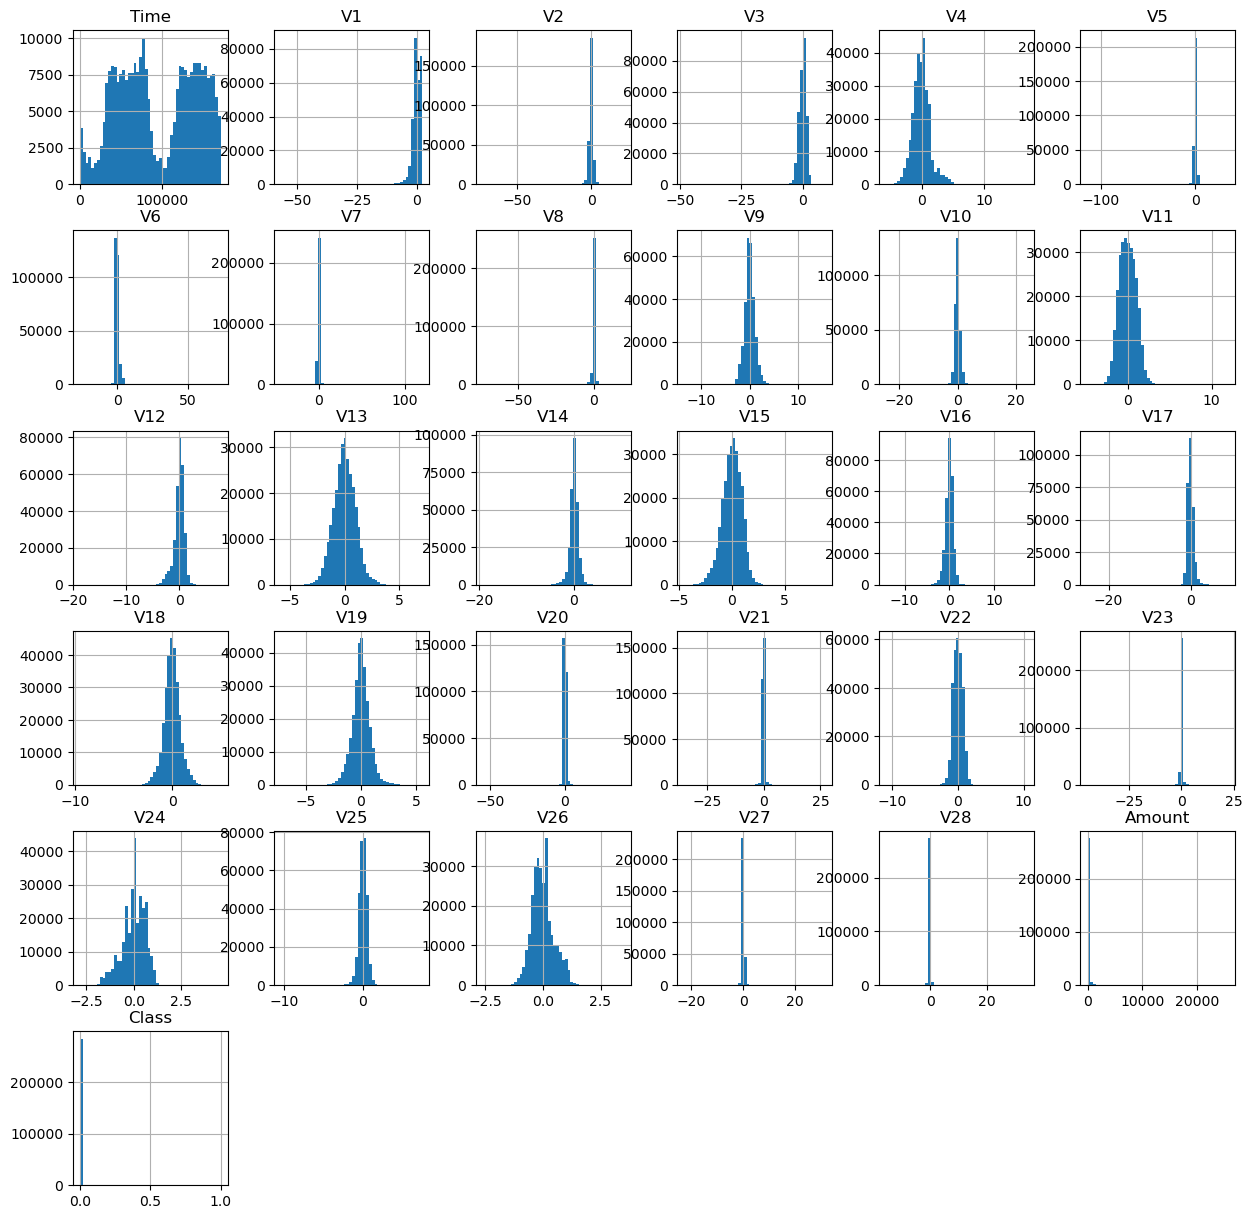

In [4]:
# histogram
df.hist(bins=50, figsize=(15, 15))

In [5]:
# exploring the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
# count null values in each attribute (column)
df.isnull().sum()
# no null values in the date 
# in case there is any null values we can treate it by filling it with the mean value as below 
# df.fillna(df.mean(), inplace=True)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

The target is the calss, so lets do some statistcs on it

In [7]:
df['Class'].value_counts()


0    284315
1       492
Name: Class, dtype: int64

In [8]:
prc = 492 / 284315
print('The % of fraud to normal transaction is:'+ str(prc))
print('data is unbalanced')

The % of fraud to normal transaction is:0.0017304750013189597
data is unbalanced


#  Splitting Data x_train, y_train / x_test, y_test

1. split the features from the target into two data sets x: for features, y: for target
2. split the data sets into training data set to train the model and test data set to test the model 

In [9]:
y = df['Class']
x = df.drop(['Class'], axis = 1)
y.head()


0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [10]:
x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


# Feature Selection

**Correlation Analysis**: in this we will study the correlation between each feature with the target

In [11]:
# from pandas.plotting import scatter_matrix
# attributes = ['Time', 'V1', 'V2', 'V3','V4', 'V5', 'Amount','Class']
# scatter_matrix(df[attributes], figsize=(12,12)) 

In [12]:
import scipy.stats

pearson_correlations = []
for column in x.columns:
    pearson_corr, _ = scipy.stats.pearsonr(x[column], y)
    pearson_correlations.append((column, pearson_corr))
    
print("Pearson Correlations:")
for feature, corr in pearson_correlations:
    print(f"{feature}: {corr:.4f}")    

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Pearson Correlations:
Time: -0.0123
V1: -0.1013
V2: 0.0913
V3: -0.1930
V4: 0.1334
V5: -0.0950
V6: -0.0436
V7: -0.1873
V8: 0.0199
V9: -0.0977
V10: -0.2169
V11: 0.1549
V12: -0.2606
V13: -0.0046
V14: -0.3025
V15: -0.0042
V16: -0.1965
V17: -0.3265
V18: -0.1115
V19: 0.0348
V20: 0.0201
V21: 0.0404
V22: 0.0008
V23: -0.0027
V24: -0.0072
V25: 0.0033
V26: 0.0045
V27: 0.0176
V28: 0.0095
Amount: 0.0056


We can see that the following have high correlation with the target: Class:

1. V1: -0.1013
2. **V3: -0.1930**
3. V4: 0.1334
4. **V10: -0.2169**
5. V11: 0.1549
6. **V12: -0.2606**
7. **V14: -0.3025**
4. **V16: -0.1965**
5. **V17: -0.3265**
6. V18: -0.1115


In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


**t-test - Feature Selection** : in this step, the t-test was applied on each continuous feature with the binary target 'Class' to assess the relationship for each.

In [14]:
t_test = []
for column in x.columns:
    fraud_values = x[column][y == 1]
    non_fraud_values = x[column][y == 0]
    t_statistic, p_value = scipy.stats.ttest_ind(fraud_values, non_fraud_values)
    t_test.append((column, t_statistic, p_value))

# Print t-test results
print("T-Test Results:")
for feature, t_statistic, p_value in t_test:
    print(f"{feature}: t-statistic={t_statistic:.4f}, p-value={p_value:.4f}")
    

T-Test Results:
Time: t-statistic=-6.5767, p-value=0.0000
V1: t-statistic=-54.3661, p-value=0.0000
V2: t-statistic=48.9224, p-value=0.0000
V3: t-statistic=-104.9500, p-value=0.0000
V4: t-statistic=71.8598, p-value=0.0000
V5: t-statistic=-50.9152, p-value=0.0000
V6: t-statistic=-23.3133, p-value=0.0000
V7: t-statistic=-101.7330, p-value=0.0000
V8: t-statistic=10.6089, p-value=0.0000
V9: t-statistic=-52.4080, p-value=0.0000
V10: t-statistic=-118.5664, p-value=0.0000
V11: t-statistic=83.6621, p-value=0.0000
V12: t-statistic=-144.0480, p-value=0.0000
V13: t-statistic=-2.4388, p-value=0.0147
V14: t-statistic=-169.3976, p-value=0.0000
V15: t-statistic=-2.2539, p-value=0.0242
V16: t-statistic=-106.9736, p-value=0.0000
V17: t-statistic=-184.3344, p-value=0.0000
V18: t-statistic=-59.8697, p-value=0.0000
V19: t-statistic=18.5739, p-value=0.0000
V20: t-statistic=10.7238, p-value=0.0000
V21: t-statistic=21.5851, p-value=0.0000
V22: t-statistic=0.4298, p-value=0.6674
V23: t-statistic=-1.4330, p-val

**p-value explanation:**
if p_value is less than the significance level (common 0.05) this means that the feature is potentially informative and we can select it in our model

**features to execlude because of high p-value:**
1. V22: t-statistic=0.4298, **p-value=0.6674**
2. V23: t-statistic=-1.4330, **p-value=0.1519**
3. V25: t-statistic=1.7652, **p-value=0.0775**
 

# Data Preprocessing - Scaling Features

The data has high and low mean so the following step will normalize the data.

**features (column) with high mean can dominate the learning process.  **

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# convert from array to panda data fram
x_train_df = pd.DataFrame(x_train)
x_train_scaled_df = pd.DataFrame(x_train_scaled)
x_test_scaled_df = pd.DataFrame(x_test_scaled)

x_train_scaled_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,...,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05,2.278450e+05
mean,-6.330627e-17,1.222466e-17,-2.182975e-18,1.422052e-17,2.120604e-18,1.864884e-17,1.793158e-17,1.325378e-18,-5.675735e-18,-1.135147e-17,...,-5.738105e-18,-1.331615e-17,7.983451e-18,5.363881e-18,7.733968e-18,-2.744311e-18,3.137247e-17,4.178838e-18,3.430389e-18,3.648687e-17
std,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,...,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00,1.000002e+00
min,-1.996122e+00,-2.880430e+01,-4.389436e+01,-3.190712e+01,-4.012934e+00,-8.196817e+01,-1.956903e+01,-3.502910e+01,-6.159673e+01,-1.213713e+01,...,-7.040710e+01,-4.754284e+01,-1.507208e+01,-7.145235e+01,-4.684839e+00,-1.973006e+01,-5.398281e+00,-2.462599e+01,-4.679040e+01,-3.470760e-01
25%,-8.556106e-01,-4.702131e-01,-3.607310e-01,-5.875478e-01,-5.988005e-01,-4.970931e-01,-5.744762e-01,-4.449136e-01,-1.750299e-01,-5.861668e-01,...,-2.743606e-01,-3.125047e-01,-7.467068e-01,-2.574878e-01,-5.858002e-01,-6.072785e-01,-6.783900e-01,-1.765169e-01,-1.614354e-01,-3.251092e-01
50%,-2.123794e-01,8.712726e-03,4.010289e-02,1.188219e-01,-1.377288e-02,-4.014511e-02,-2.051415e-01,3.231399e-02,1.902688e-02,-4.680929e-02,...,-8.140614e-02,-4.075041e-02,9.245866e-03,-1.717317e-02,6.769125e-02,3.081857e-02,-1.074116e-01,3.462238e-03,3.368619e-02,-2.607777e-01
75%,9.373337e-01,6.713016e-01,4.855023e-01,6.776435e-01,5.248357e-01,4.397146e-01,2.967299e-01,4.580250e-01,2.758507e-01,5.449214e-01,...,1.713329e-01,2.537002e-01,7.288239e-01,2.360496e-01,7.267500e-01,6.735478e-01,4.995509e-01,2.275448e-01,2.371519e-01,-4.463973e-02
max,1.642496e+00,1.253114e+00,1.331530e+01,2.765675e+00,1.191991e+01,2.507859e+01,5.483409e+01,9.697579e+01,1.683234e+01,9.468289e+00,...,5.092806e+01,3.713086e+01,1.448251e+01,3.592436e+01,7.572562e+00,1.441376e+01,7.291104e+00,7.867265e+01,1.026381e+02,1.004303e+02


In [16]:
x_train_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
count,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,...,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000,227845.000000
mean,94792.551673,0.000916,-0.000384,-0.000920,-0.001458,0.000997,-0.000613,0.001090,-0.000383,0.000961,...,0.000398,0.000215,-0.001215,0.000175,-0.000217,-0.000979,-0.000192,-0.000032,0.000257,88.479993
std,47488.471663,1.958337,1.656602,1.514545,1.415853,1.387667,1.336803,1.243493,1.188643,1.097553,...,0.774045,0.732617,0.725311,0.627103,0.605446,0.521764,0.482443,0.401821,0.329776,254.930277
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.320155,...,-54.497720,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-9.895244,-15.430084,0.000000
25%,54161.000000,-0.919918,-0.597971,-0.890786,-0.849270,-0.688802,-0.768573,-0.552156,-0.208431,-0.642386,...,-0.211969,-0.228730,-0.542809,-0.161296,-0.354887,-0.317835,-0.327476,-0.070960,-0.052980,5.600000
50%,84707.000000,0.017978,0.066050,0.179041,-0.020959,-0.054711,-0.274846,0.041272,0.022233,-0.050414,...,-0.062614,-0.029639,0.005491,-0.010595,0.040766,0.015101,-0.052011,0.001359,0.011366,22.000000
75%,139305.000000,1.315548,0.803898,1.025399,0.741630,0.611173,0.396056,0.570639,0.327504,0.599040,...,0.133017,0.186080,0.527408,0.148202,0.439790,0.350453,0.240813,0.091400,0.078464,77.100000
max,172792.000000,2.454930,22.057729,4.187811,16.875344,34.801666,73.301626,120.589494,20.007208,10.392889,...,39.420904,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000


As shown above x_train_df statistics differ from x_train_sacled_df after transforming the data  

In [17]:
x_test_scaled_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,...,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000,56962.000000
mean,0.002243,-0.002338,0.001159,0.003037,0.005150,-0.003591,0.002293,-0.004381,0.001612,-0.004380,...,-0.002568,-0.001471,0.008379,-0.001393,0.001792,0.009384,0.001986,0.000398,-0.003902,-0.002557
std,0.999975,1.000923,0.983929,1.005639,1.000055,0.972974,0.982940,0.974002,1.023805,1.004909,...,0.979691,1.012961,1.002671,0.978755,1.001670,0.995309,0.997765,1.022357,1.004648,0.901726
min,-1.996122,-17.437865,-29.011536,-22.237789,-3.926023,-17.057961,-15.611164,-33.380157,-42.417980,-12.240917,...,-27.820445,-31.243645,-12.251046,-52.350605,-4.665385,-16.665894,-4.287288,-56.158624,-35.512473,-0.347076
25%,-0.852194,-0.471269,-0.362460,-0.586173,-0.596405,-0.506856,-0.573469,-0.451345,-0.175598,-0.589649,...,-0.272729,-0.310306,-0.743894,-0.262029,-0.583139,-0.600367,-0.672756,-0.174792,-0.161071,-0.325148
50%,-0.213148,0.009105,0.039089,0.121269,-0.010140,-0.038786,-0.202955,0.027625,0.019441,-0.050468,...,-0.080714,-0.039578,0.018094,-0.021536,0.069768,0.045295,-0.108559,0.003298,0.031905,-0.260778
75%,0.939124,0.671571,0.484784,0.683049,0.530470,0.442171,0.306663,0.457072,0.275027,0.536981,...,0.171465,0.255632,0.736177,0.231973,0.725065,0.676237,0.500989,0.222574,0.234493,-0.043110
max,1.642391,1.245085,12.958834,6.195589,8.970583,20.909328,12.338295,17.238923,16.126591,14.208029,...,25.510284,37.130859,11.530525,35.214957,6.591624,11.637140,7.178967,22.898111,48.341617,38.879422


# Oversampling

In our data set we have the following counts for the results for our target "Class":

0:    **284315**  - non fraud

1:       **492**  - fraud


we will use it in the mdel and test the accuracy


In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_scaled_oversampled, y_train_oversampled = smote.fit_resample(x_train_scaled, y_train)


# Undersampling

we will use also undersampling in the model and test the accuracy and take the better model


In [19]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)
X_train_scaled_undersampled, y_train_undersampled = under_sampler.fit_resample(x_train_scaled, y_train)


    # **Neural Network**

here we used two activation function:
1. ReLU (Rectified Linear Activation):f(x) = max(0, x) used in hidden layers to address the vanishing gradient problem
2. Sigmoid Activation: f(x) = 1 / (1 + exp(-x)) for target prediction

** we used all the feature in this model as NN can handle large number of inputs 


># Model 1: NN with Oversampling - All features 

In [20]:
from keras.models import Sequential
from keras.layers import Dense

# step1: build the model
model_nn_oversampling = Sequential()
model_nn_oversampling.add(Dense(64, activation='relu', input_shape=(x_train_scaled_oversampled.shape[1],)))
model_nn_oversampling.add(Dense(32, activation='relu'))
model_nn_oversampling.add(Dense(1, activation='sigmoid'))

#Step2: compile the model
model_nn_oversampling.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Step3: train the model
model_nn_oversampling.fit(x_train_scaled_oversampled, y_train_oversampled, epochs=10, batch_size=32, validation_split=0.1)

#Step4: Evaluate the model
loss, accuracy = model_nn_oversampling.evaluate(x_test_scaled, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")







/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

Epoch 1/10
12795/12795 [==============================] - 21s 2ms/step - loss: 0.0183 - accuracy: 0.9943 - val_loss: 0.0020 - val_accuracy: 0.9999
Epoch 2/10
12795/12795 [==============================] - 21s 2ms/step - loss: 0.0049 - accuracy: 0.9989 - val_loss: 5.4718e-04 - val_accuracy: 1.0000
Epoch 3/10
12795/12795 [==============================] - 21s 2ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 0.0025 - val_accuracy: 0.9997
Epoch 4/10
12795/12795 [==============================] - 21s 2ms/step - loss: 0.0031 - accuracy: 0.9993 - val_loss: 2.6829e-04 - val_accuracy: 1.0000
Epoch 5/10
12795/12795 [==============================] - 21s 2ms/step - loss: 0.0025 - accuracy: 0.9994 - val_loss: 0.0013 - val_accuracy: 0.9998
Epoch 6/10
12795/12795 [==============================] - 20s 2ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0135 - val_accuracy: 0.9963
Epoch 7/10
12795/12795 [==============================] - 22s 2ms/step - loss: 0.0019 - accuracy: 0.9996 - val

In this model: the **Test loss value of 0.0179** indicates that the model's predictions are closer to the actual outcomes.

The **Accuracy of 0.9988** reflect statistics on correctly predicted instances


In [21]:
# step 5: predect values 
predictions = model_nn_oversampling.predict(x_test_scaled)
print(predictions)

#convert results to binary
print("**** As binary Output ******")
binary_predictions = (predictions >= 0.5).astype(int)
print(binary_predictions)

1781/1781 [==============================] - 2s 875us/step
[[1.0000000e+00]
 [0.0000000e+00]
 [1.4887687e-37]
 ...
 [1.6905156e-27]
 [0.0000000e+00]
 [4.2723390e-12]]
**** As binary Output ******
[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]


># **Model 2: NN with Undersampling - all features **

In [22]:
# step1: build the model
model_nn_undersampling = Sequential()
model_nn_undersampling.add(Dense(64, activation='relu', input_shape=(X_train_scaled_undersampled.shape[1],)))
model_nn_undersampling.add(Dense(32, activation='relu'))
model_nn_undersampling.add(Dense(1, activation='sigmoid'))

#Step2: compile the model
model_nn_undersampling.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#Step3: train the model
model_nn_undersampling.fit(X_train_scaled_undersampled, y_train_undersampled, epochs=10, batch_size=32, validation_split=0.1)

#Step4: Evaluate the model
loss, accuracy = model_nn_undersampling.evaluate(x_test_scaled, y_test)
print(f"Test loss: {loss:.4f}, Test accuracy: {accuracy:.4f}")

Epoch 1/10
23/23 [==============================] - 1s 8ms/step - loss: 0.4790 - accuracy: 0.6968 - val_loss: 0.1665 - val_accuracy: 0.8734
Epoch 2/10
23/23 [==============================] - 0s 2ms/step - loss: 0.3015 - accuracy: 0.9210 - val_loss: 0.1622 - val_accuracy: 0.8734
Epoch 3/10
23/23 [==============================] - 0s 2ms/step - loss: 0.2261 - accuracy: 0.9295 - val_loss: 0.1592 - val_accuracy: 0.8987
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1833 - accuracy: 0.9422 - val_loss: 0.1567 - val_accuracy: 0.9114
Epoch 5/10
23/23 [==============================] - 0s 2ms/step - loss: 0.1571 - accuracy: 0.9478 - val_loss: 0.1540 - val_accuracy: 0.9114
Epoch 6/10
23/23 [==============================] - 0s 2ms/step - loss: 0.1458 - accuracy: 0.9506 - val_loss: 0.1597 - val_accuracy: 0.9114
Epoch 7/10
23/23 [==============================] - 0s 3ms/step - loss: 0.1332 - accuracy: 0.9506 - val_loss: 0.1710 - val_accuracy: 0.9241
Epoch 8/10
23/23 [==

In this model: the Test loss value is 0.1102 wich is greater than the first model, this means 

The Accuracy of 0.9702 which is less than the first model

**Conclution** 

> *model_nn_oversampling is better than model_nn_undersampling*

# Random Forests